In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

In [2]:
fcst = pd.read_excel('../Excel/20210210_MVCM_Car sales fcst.xlsm')
fcst

,Year,Month,t,Units,T*C
0,2009.0,1,1,69664,NaN
1,NaN,2,2,61579,NaN
2,NaN,3,3,64242,NaN
3,NaN,4,4,51395,NaN
4,NaN,5,5,53440,NaN
...,...,...,...,...,...
127,NaN,8,128,108074,NaN
128,NaN,9,129,100757,NaN
129,NaN,10,130,107110,NaN
130,NaN,11,131,124804,NaN


In [3]:
fcst_c = fcst[['Month','t','Units','T*C']]
fcst_c = fcst_c.dropna().reset_index(drop=True)
fcst_c

,Month,t,Units,T*C
0,7,7,56443,62677.083333
1,8,8,58926,62357.875000
2,9,9,58505,62320.833333
3,10,10,67882,62746.208333
4,11,11,64914,63464.083333
...,...,...,...,...
115,2,122,104009,114119.958333
116,3,123,117529,113055.625000
117,4,124,98366,112029.666667
118,5,125,102422,111203.375000


In [4]:
fcst_c['S*I'] = fcst_c['Units']/fcst_c['T*C']
fcst_c

,Month,t,Units,T*C,S*I
0,7,7,56443,62677.083333,0.900536
1,8,8,58926,62357.875000,0.944965
2,9,9,58505,62320.833333,0.938771
3,10,10,67882,62746.208333,1.081850
4,11,11,64914,63464.083333,1.022846
...,...,...,...,...,...
115,2,122,104009,114119.958333,0.911401
116,3,123,117529,113055.625000,1.039568
117,4,124,98366,112029.666667,0.878035
118,5,125,102422,111203.375000,0.921033


In [5]:
n = 12
ies = fcst_c[['Month','S*I']]
ies = ies.rename(columns={'S*I':'S'})
ies = ies.groupby('Month', as_index=False).mean()
suma = ies['S'].sum()
ies['S Aj'] = ies['S']/suma*n
ies = ies[['Month','S Aj']]
ies

,Month,S Aj
0,1,0.957382
1,2,0.908366
2,3,0.989960
3,4,0.889992
4,5,0.945041
5,6,0.952528
6,7,0.951830
7,8,0.995334
8,9,0.942766
9,10,1.012921


In [6]:
fcst_m = pd.merge(fcst_c,ies).sort_values(by='t').reset_index(drop=True)
fcst_m

,Month,t,Units,T*C,S*I,S Aj
0,7,7,56443,62677.083333,0.900536,0.951830
1,8,8,58926,62357.875000,0.944965,0.995334
2,9,9,58505,62320.833333,0.938771,0.942766
3,10,10,67882,62746.208333,1.081850,1.012921
4,11,11,64914,63464.083333,1.022846,1.096314
...,...,...,...,...,...,...
115,2,122,104009,114119.958333,0.911401,0.908366
116,3,123,117529,113055.625000,1.039568,0.989960
117,4,124,98366,112029.666667,0.878035,0.889992
118,5,125,102422,111203.375000,0.921033,0.945041


<IPython.core.display.Javascript object>


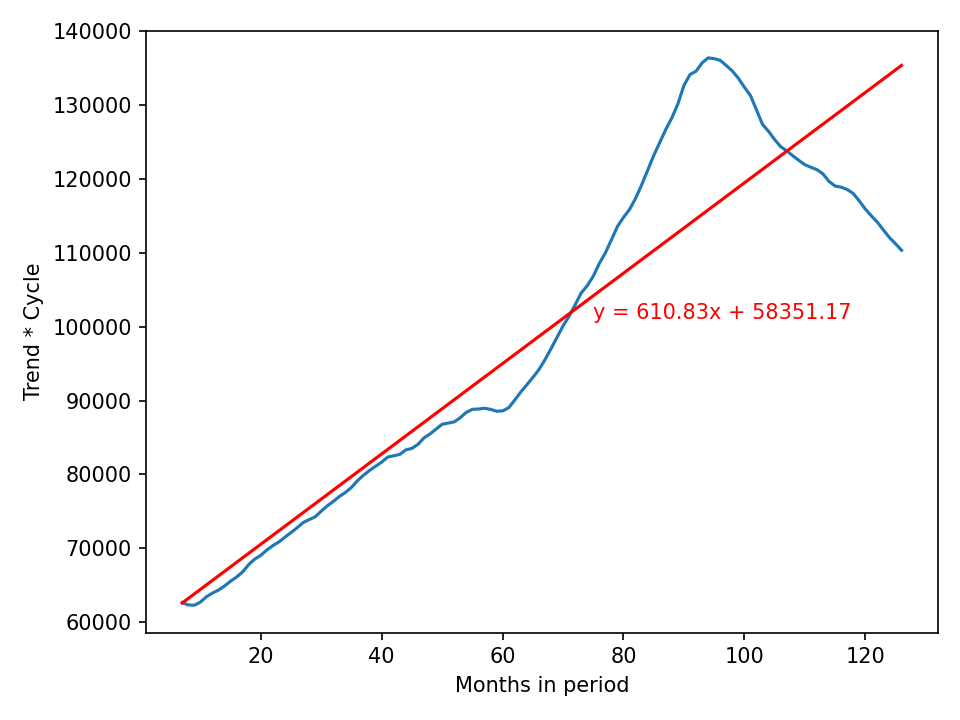

The r-squared is: 0.8420594675241703


In [7]:
x_values = fcst_m['t']
y_values = fcst_m['T*C']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(75,101000),fontsize=10,color="red")
plt.xlabel('Months in period')
plt.ylabel('Trend * Cycle')
print(f"The r-squared is: {rvalue**2}")
plt.tight_layout()
plt.show()
plt.savefig('../Graphs/20210210_MVCM_TrendCycle Graph with regression.png')

In [8]:
fcst_r = fcst_m[['Month','t','Units','T*C','S*I','S Aj']]
fcst_r['T'] = intercept + slope * fcst_r['t']
fcst_r['C'] = fcst_r['T*C']/fcst_r['T']
fcst_r['Ft'] = fcst_r['S Aj'] * fcst_r['T'] * fcst_r['C']
fcst_r['et'] = fcst_r['Units'] - fcst_r['Ft']
fcst_r['ABS(et)'] = fcst_r['et'].abs()
fcst_r['et^2'] = fcst_r['et']**2
fcst_r['et/Units'] = fcst_r['et']/fcst_r['Units']
fcst_r['ABS(et/Units)'] = fcst_r['et/Units'].abs()
fcst_r

,Month,t,Units,T*C,S*I,S Aj,T,C,Ft,et,ABS(et),et^2,et/Units,ABS(et/Units)
0,7,7,56443,62677.083333,0.900536,0.951830,62626.989038,1.000800,59657.897072,-3214.897072,3214.897072,1.033556e+07,-0.056958,0.056958
1,8,8,58926,62357.875000,0.944965,0.995334,63237.820607,0.986085,62066.904462,-3140.904462,3140.904462,9.865281e+06,-0.053303,0.053303
2,9,9,58505,62320.833333,0.938771,0.942766,63848.652175,0.976071,58753.944729,-248.944729,248.944729,6.197348e+04,-0.004255,0.004255
3,10,10,67882,62746.208333,1.081850,1.012921,64459.483743,0.973421,63556.934215,4325.065785,4325.065785,1.870619e+07,0.063714,0.063714
4,11,11,64914,63464.083333,1.022846,1.096314,65070.315312,0.975315,69576.593197,-4662.593197,4662.593197,2.173978e+07,-0.071827,0.071827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2,122,104009,114119.958333,0.911401,0.908366,132872.619410,0.858867,103662.679176,346.320824,346.320824,1.199381e+05,0.003330,0.003330
116,3,123,117529,113055.625000,1.039568,0.989960,133483.450979,0.846964,111920.532639,5608.467361,5608.467361,3.145491e+07,0.047720,0.047720
117,4,124,98366,112029.666667,0.878035,0.889992,134094.282547,0.835454,99705.458874,-1339.458874,1339.458874,1.794150e+06,-0.013617,0.013617
118,5,125,102422,111203.375000,0.921033,0.945041,134705.114116,0.825532,105091.724074,-2669.724074,2669.724074,7.127427e+06,-0.026066,0.026066


In [9]:
me = fcst_r['et'].mean()
mad = fcst_r['ABS(et)'].mean()
mse = fcst_r['et^2'].mean()
mpe = fcst_r['et/Units'].mean()
mape = fcst_r['ABS(et/Units)'].mean()

measurement_errors = pd.DataFrame({
    'ME': [me],
    'MAD': [mad],
    'MSE': [mse],
    'MPE': [mpe],
    'MAPE': [mape]
})
measurement_errors

,ME,MAD,MSE,MPE,MAPE
0,53.892189,2957.336953,1.470680e+07,-0.001301,0.029785


In [10]:
fcst_nocovid = pd.DataFrame({
    'Month':[1,2,3,4,5,6,7,8,9,10,11,12,1],
    't':[133,134,135,136,137,138,139,140,141,142,143,144,145]
})
fcst_nocovid = pd.merge(fcst_nocovid,ies).sort_values(by='t').reset_index(drop=True)
fcst_nocovid['T'] = slope * fcst_nocovid['t'] + intercept
fcst_nocovid['C'] = 1
fcst_nocovid['Ft'] = fcst_nocovid['S Aj'] * fcst_nocovid['T'] * fcst_nocovid['C']
fcst_nocovid

,Month,t,S Aj,T,C,Ft
0,1,133,0.957382,139591.766663,1,133642.590312
1,2,134,0.908366,140202.598232,1,127355.259960
2,3,135,0.989960,140813.429800,1,139399.645670
3,4,136,0.889992,141424.261369,1,125866.400349
4,5,137,0.945041,142035.092937,1,134228.954794
5,6,138,0.952528,142645.924506,1,135874.268153
6,7,139,0.951830,143256.756074,1,136356.006920
7,8,140,0.995334,143867.587642,1,143196.281422
8,9,141,0.942766,144478.419211,1,136209.299569
9,10,142,1.012921,145089.250779,1,146963.907654


In [11]:
writer = pd.ExcelWriter('../Excel/20210211_MVCM_Car sales fcst_COMPLETE.xlsx', engine='xlsxwriter')
fcst_r.to_excel(writer, sheet_name='Historic Data', index=False)
fcst_nocovid.to_excel(writer, sheet_name='Jan 2020 - Jan 2021 Fcst', index=False)
measurement_errors.to_excel(writer, sheet_name='Measurement Errors', index=False)
writer.save()

<IPython.core.display.Javascript object>


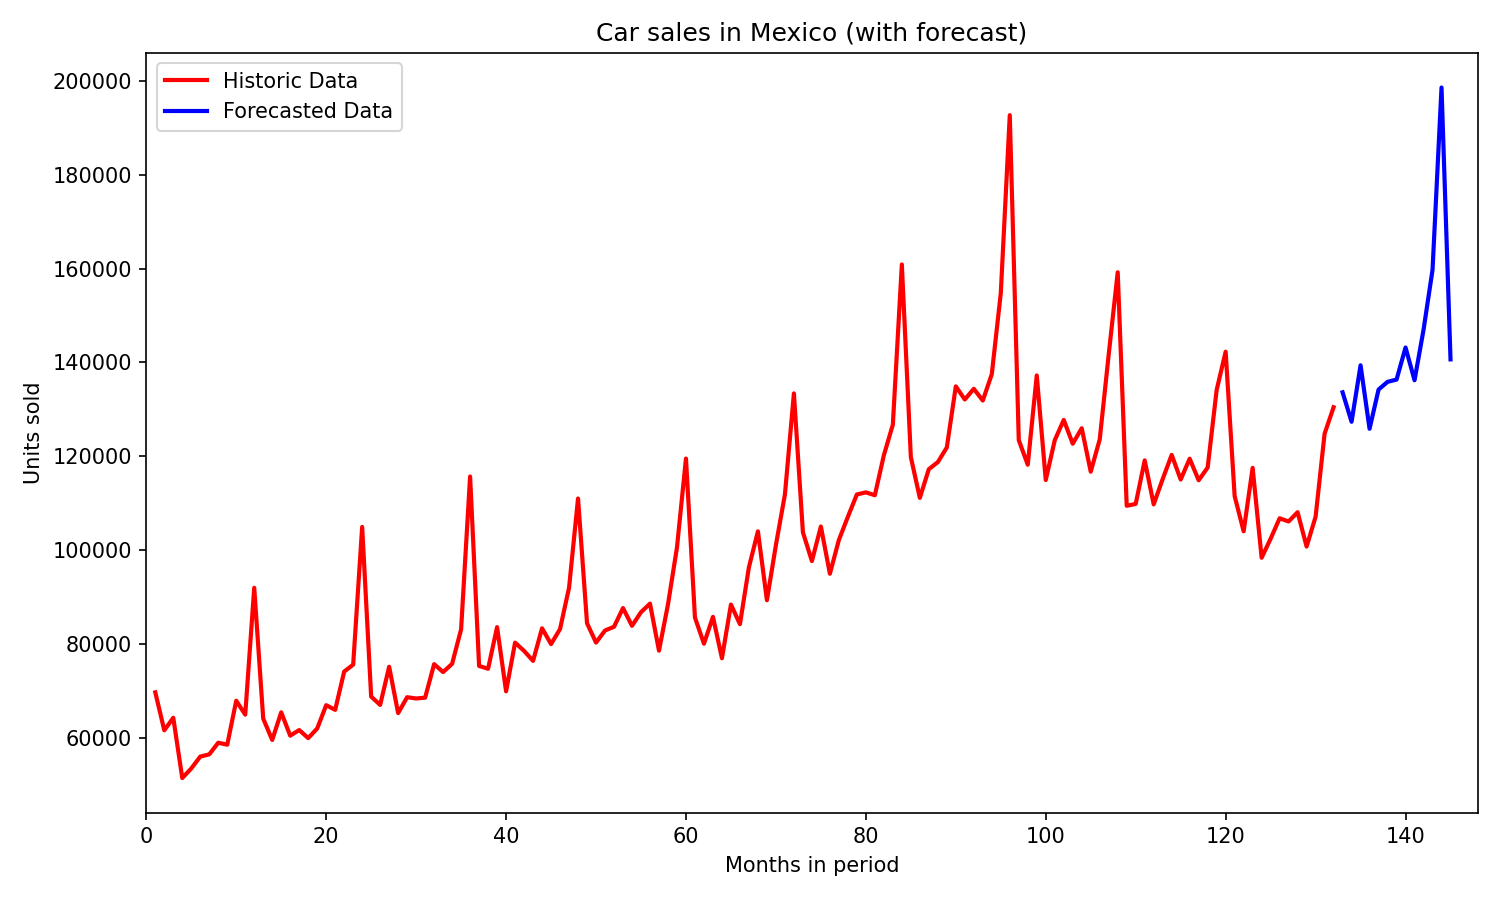

In [21]:
hist_axis = [i for i in range(1,len(fcst['t']) + 1)]
hist = fcst['Units']
fcst_axis = [i for i in range(min(fcst_nocovid['t']),max(fcst_nocovid['t']) + 1)]
forecast = fcst_nocovid['Ft']

plt.figure(figsize=(10,6))
plt.plot(hist_axis, hist, color='red', linewidth=2, label='Historic Data')
plt.plot(fcst_axis, forecast, color='blue', linewidth=2, label='Forecasted Data')
plt.title('Car sales in Mexico (with forecast)')
plt.xlabel('Months in period')
plt.ylabel('Units sold')
plt.legend()
plt.xlim(0,max(fcst_nocovid['t']) + 3)
plt.tight_layout()
plt.show()
plt.savefig('../Graphs/20210211_Car Sales in Mexico (with forecast).png')

In [34]:
data_2020 = pd.read_csv('../raiavl_venta_mensual_2005_2021/conjunto_de_datos/raiavl_venta_mensual_tr_cifra_2020.csv')
data_2021 = pd.read_csv('../raiavl_venta_mensual_2005_2021/conjunto_de_datos/raiavl_venta_mensual_tr_cifra_2021.csv')

data_h = pd.concat([data_2020,data_2021], ignore_index=True)
data_h = data_h.rename(columns={'ANIO':'Year', 'ID_MES':'Month', 'UNI_VEH':'Units'})
data_h = data_h[['Year','Month','Units']]
data_h = data_h.groupby(['Year','Month']).sum()
data_h['t'] = [i for i in range(133,len(data_h['Units']) + 133)]
data_h = data_h[['t','Units']]
data_h

t   Units
Year Month             
2020 1      133  104852
     2      134  104338
     3      135   87541
     4      136   34927
     5      137   42034
     6      138   62861
     7      139   72921
     8      140   77120
     9      141   77808
     10     142   84331
     11     143   95485
     12     144  105135
2021 1      145   81203

In [36]:
hist_data = fcst[['t','Units']]
hist_data = pd.concat([hist_data,data_h], ignore_index=True)
hist_data

,t,Units
0,1,69664
1,2,61579
2,3,64242
3,4,51395
4,5,53440
...,...,...
140,141,77808
141,142,84331
142,143,95485
143,144,105135


<IPython.core.display.Javascript object>


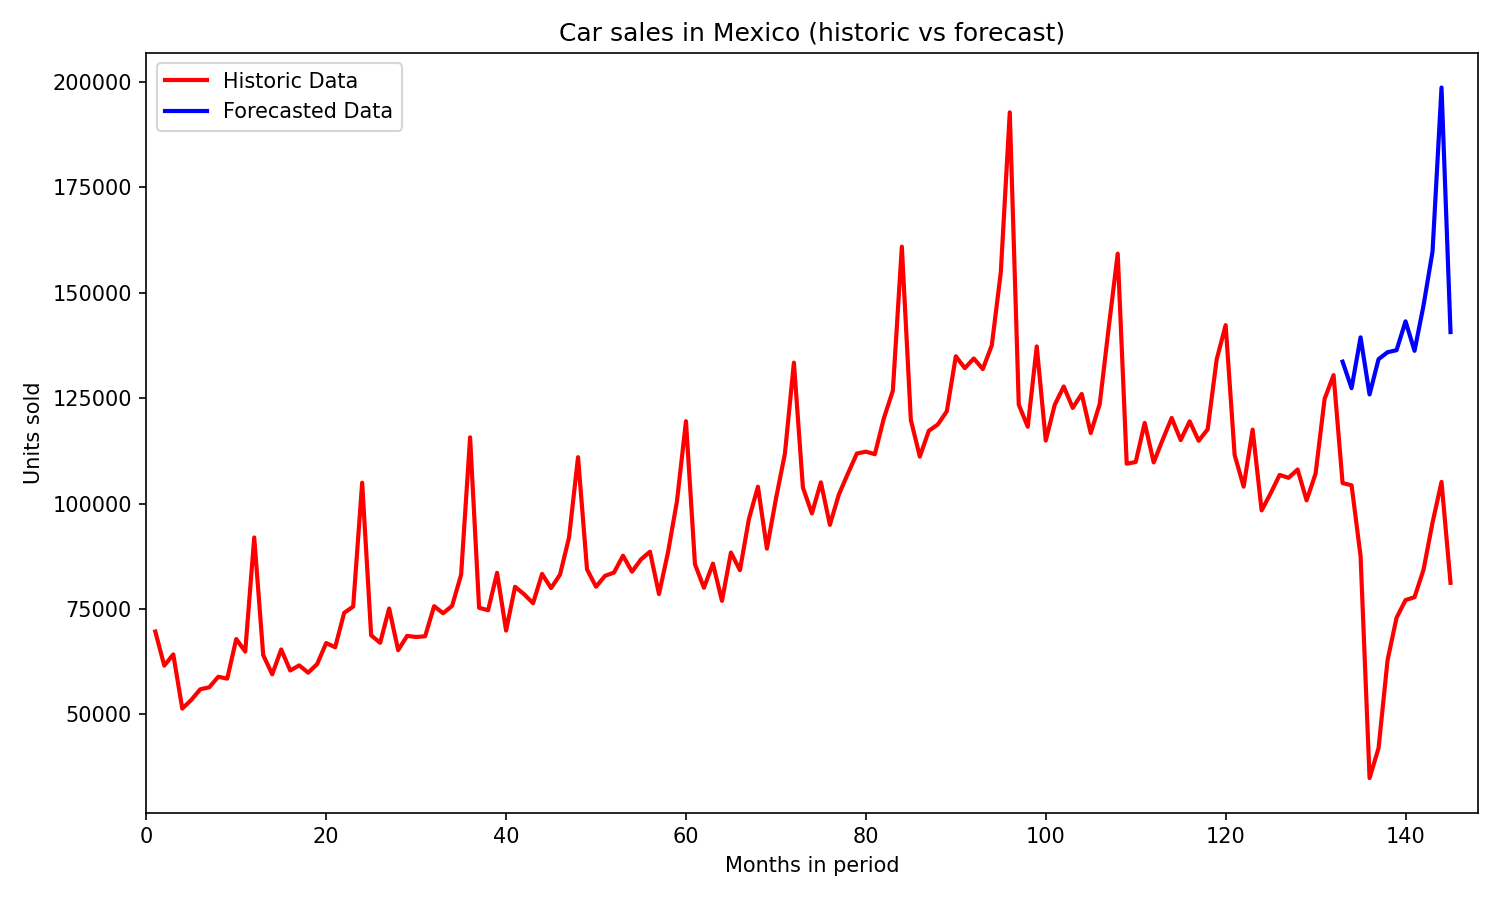

In [37]:
histC_axis = [i for i in range(1,len(hist_data['t']) + 1)]
histC = hist_data['Units']

plt.figure(figsize=(10,6))
plt.plot(histC_axis, histC, color='red', linewidth=2, label='Historic Data')
plt.plot(fcst_axis, forecast, color='blue', linewidth=2, label='Forecasted Data')
plt.title('Car sales in Mexico (historic vs forecast)')
plt.xlabel('Months in period')
plt.ylabel('Units sold')
plt.legend()
plt.xlim(0,max(fcst_nocovid['t']) + 3)
plt.tight_layout()
plt.show()
plt.savefig('../Graphs/20210211_Car Sales in Mexico (historic vs forecast).png')